## SIR-like adaption of the hodgkin huxley neuron Model

### ACME Volume 4 Project: Rex Boyce, Daniel Christiensen, Ed Ringger, Stephen Yacktman

### This code was adapted from this "Intro to the Hodgkin Huxley Model using Python" code found online at the following link: 

https://hodgkin-huxley-tutorial.readthedocs.io/en/latest/_static/Hodgkin%20Huxley.html

In [1]:
import scipy as sp
import pylab as plt
import numpy as np
from scipy.integrate import odeint
from matplotlib import animation

plt.rcParams["figure.figsize"] = (20, 14)
Z = 10

%matplotlib inline

In [2]:
def make_movie(U, x, titles, name, xlim=(0,450), ylim=(-70,50), interval=10):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    sol, = ax.plot([],[])
    def update(i):
        sol.set_data(x,U[i])
        ax.set_title(f"{round(titles[i], 4)} nA")
        return sol
    ani = animation.FuncAnimation(fig, update, frames=range(len(U)), interval=interval)
    ani.save(name)

In [3]:

class HodgkinHuxley():
    """Full Modified Hodgkin-Huxley Model implemented in Python"""

    C_m  =   1.0
    """membrane capacitance, in uF/cm^2"""

    g_Na = 120.0
    """Sodium (Na) maximum conductances, in mS/cm^2"""

    g_K  =  36.0
    """Postassium (K) maximum conductances, in mS/cm^2"""

    g_L  =   0.3
    """Leak maximum conductances, in mS/cm^2"""

    E_Na =  50.0
    """Sodium (Na) Nernst reversal potentials, in mV"""

    E_K  = -77.0
    """Postassium (K) Nernst reversal potentials, in mV"""

    E_L  = -54.387
    """Leak Nernst reversal potentials, in mV"""

    t = np.arange(0.0, 450.0, 0.01)
    """ The time to integrate over """

    def o(self, V, scalar=0.75):
        return (np.tanh((V + 55) * scalar) / 2) + 0.5

    def d(self, V, scalar=0.75):
        return 1

    def r(self, V):
        return int(V < -65)

    def alpha_n(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 0.01*(V+55.0)/(1.0 - np.exp(-(V+55.0) / 10.0))

    def beta_n(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 0.125*np.exp(-(V+65) / 80.0)

    def I_Na(self, V, c, h):
        """
        Membrane current (in uA/cm^2)
        Sodium (Na = element name)
        """
        return self.g_Na * (1 - c - h) * (V - self.E_Na)

    def I_K(self, V, n):
        """
        Membrane current (in uA/cm^2)
        Potassium (K = element name)

        |  :param V:
        |  :param h:
        |  :return:
        """
        return self.g_K  * n**4 * (V - self.E_K)
    
    #  Leak
    def I_L(self, V):
        """
        Membrane current (in uA/cm^2)
        Leak

        |  :param V:
        |  :param h:
        |  :return:
        """
        return self.g_L * (V - self.E_L)

    def get_dALLdt(self, inj):
        def dALLdt(X, t):
            """
            Integrate

            |  :param X:
            |  :param t:
            |  :return: calculate membrane potential & activation variables
            """
            V, c, h, n = X

            dVdt = (inj - self.I_Na(V, c, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m

            # our new SIR model
            dcdt = self.r(V)*h - self.o(V)*c
            dhdt = self.d(V)*(1 - c - h) - self.r(V)*h

            dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
            return dVdt, dcdt, dhdt, dndt
        return dALLdt

    def Main(self):
        """
        Main demo for our altered Hodgkin Huxley neuron model
        """
        U = []
        injs = np.concatenate((np.linspace(0, 10, 100), np.linspace(10, 40, 100)))
        for inj in injs:
            U.append(odeint(self.get_dALLdt(inj), [-65, 1, 0, 0.32], self.t)[:,0])

        make_movie(U, self.t, injs, 'bifurcation_animation.mp4', interval=50)

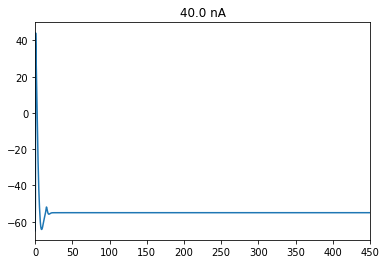

In [4]:
runner = HodgkinHuxley()
runner.Main()

<video src='bifurcation_animation.mp4' controls>